# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from scipy.stats import chi2 # Distribution (cdf etc.)
from scipy.stats import chisquare # Statistical test (chistat, pvalue)
from scipy.stats import chi2_contingency # Categorical Vs Categorical
from scipy.stats import ttest_rel,ttest_1samp
from scipy.stats import binom,t

# Chi Square Test ( Test of independance)

In [6]:
# Ho : Gender Doesn't affect( Independant)
# Ha : Gender Affect( Dependant)
observed =[[527,72],[206,102]]
chi_stat,p_value,dof,expected=chi2_contingency(observed)
print("chi_stat : ",chi_stat)
print("p_value : ",p_value)
print("dof : ",dof)
print("expected : ",expected)
alpha = 0.05
if p_value< alpha:
    print("Interpretation : Reject Ho")
    print("Conclusion : Gender Affects the buying pattern")
else:
    print("Interpretation : Fail to Reject Ho")

chi_stat :  57.04098674049609
p_value :  4.268230756875865e-14
dof :  1
expected :  [[484.08710033 114.91289967]
 [248.91289967  59.08710033]]
Interpretation : Reject Ho
Conclusion : Gender Affects the buying pattern


# Aerofit

In [44]:
df=pd.read_csv("aerofit.csv")
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


## Gender Vs Product

In [30]:
gender_product=pd.crosstab(columns=df["Product"],index=df["Gender"])
gender_product

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


In [31]:
# Ho : Gender Doesnt affect ( independant)
# Ha : Gender Affects buying pattern ( dependant)


chi_stat,p_value,dof,expected_freq=chi2_contingency(gender_product)
print("chi_stat : ",chi_stat)
print("p_value : ",p_value)
print("dof : ",dof)
print("expected_freq : ",expected_freq)
alpha = 0.05
if p_value <alpha :
    print("Interpretation : Reject Ho")
else:
    print("Interpretation : Fail to Reject Ho")

chi_stat :  12.923836032388664
p_value :  0.0015617972833158714
dof :  2
expected_freq :  [[33.77777778 25.33333333 16.88888889]
 [46.22222222 34.66666667 23.11111111]]
Interpretation : Reject Ho


## product vs Income

<AxesSubplot:xlabel='Product', ylabel='Income'>

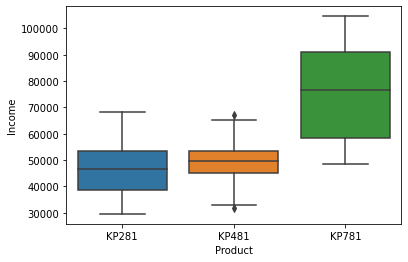

In [32]:
sns.boxplot(x=df["Product"],y=df["Income"])

In [33]:
bins= [0 , df["Income"].median(),df["Income"].max()]
labels = ["low","high"]
df["income_bin"]=pd.cut(x=df["Income"],bins=bins, labels=labels)
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,income_bin
0,KP281,18,Male,14,Single,3,4,29562,112,low
1,KP281,19,Male,15,Single,2,3,31836,75,low
2,KP281,19,Female,14,Partnered,4,3,30699,66,low
3,KP281,19,Male,12,Single,3,3,32973,85,low
4,KP281,20,Male,13,Partnered,4,2,35247,47,low
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,high
176,KP781,42,Male,18,Single,5,4,89641,200,high
177,KP781,45,Male,16,Single,5,5,90886,160,high
178,KP781,47,Male,18,Partnered,4,5,104581,120,high


In [37]:
income_product=pd.crosstab(columns=df["Product"],index=df["income_bin"],margins=True)
income_product

Product,KP281,KP481,KP781,All
income_bin,,,,
low,50,35,5,90
high,30,25,35,90
All,80,60,40,180


In [36]:
# Ho : Income Doesnt affect ( independant)
# Ha : Income Affects buying pattern ( dependant)


chi_stat,p_value,dof,expected_freq=chi2_contingency(income_product)
print("chi_stat : ",chi_stat)
print("p_value : ",p_value)
print("dof : ",dof)
print("expected_freq : ",expected_freq)
alpha = 0.05
if p_value <alpha :
    print("Interpretation : Reject Ho")
else:
    print("Interpretation : Fail to Reject Ho")

chi_stat :  29.166666666666668
p_value :  4.640222499769401e-07
dof :  2
expected_freq :  [[40. 30. 20.]
 [40. 30. 20.]]
Interpretation : Reject Ho


## Gender vs Income

In [40]:
income_gender=pd.crosstab(columns=df["Gender"],index=df["income_bin"])
income_gender

Gender,Female,Male
income_bin,,
low,46,44
high,30,60


In [41]:
# Ho : Gender Doesnt affect Income( independant)
# Ha : Gender Affects Income ( dependant)

chi_stat,p_value,dof,expected_freq=chi2_contingency(income_gender)
print("chi_stat : ",chi_stat)
print("p_value : ",p_value)
print("dof : ",dof)
print("expected_freq : ",expected_freq)
alpha = 0.05
if p_value <alpha :
    print("Interpretation : Reject Ho")
else:
    print("Interpretation : Fail to Reject Ho")

chi_stat :  5.123987854251013
p_value :  0.023597328751612023
dof :  1
expected_freq :  [[38. 52.]
 [38. 52.]]
Interpretation : Reject Ho


In [43]:
chi2.ppf(0.95,df=1)

3.841458820694124

In [47]:
3.5+(1.28*((0.7)/np.sqrt(45)))

3.6335677938559874

In [48]:
3.72+(1.28*((0.7)/np.sqrt(45)))

3.8535677938559876

In [49]:
3.5+(1.28*((0.7)))

4.396